<a href="https://colab.research.google.com/github/Pedro-Prestes/learning/blob/master/AVA_Doutorado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **`Análise do CONSTRUTO _ Funcionalidade do Ambiente Virtual de Aprendizagem - Moodle`**

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
%matplotlib inline
!pip install bokeh

In [0]:
ava = pd.read_csv('/content/drive/My Drive/Pesquisa_Doutorado/Análise_doutorado/Escolas_participantes/Construtos em CSV/Construto_Geral_1ºMódulo.csv')

In [32]:
ava.head()

,Escolas,O Ambiente Virtual de Aprendizagem (AVA) apresenta ferramentas que estimulam o meu auto aprendizado.,A qualidade/velocidade da conexão de rede à internet influencia na minha aprendizagem.,O AVA possui ferramentas para discussão em grupos que favorece a feedback com meus colegas.,"Utilizar o AVA foi fácil e simples, não tive dificuldades.","As ferramentas disponíveis no AVA, como calendário, caixa de mensagens, chats, fóruns, questionários, entre outras, foram importantes para o meu aprendizado.",A interface do sistema foi amigável e de fácil manuseio.,"O material didático, disponível me ajudou a compreender o conteúdo.",A disposição do conteúdo didático no material do modulo foi de fácil compreensão e assimilação.,O material on-line foi adequado aos conteúdos programáticos do modulo.,O método de avaliação utilizado instiga minha participação na atividade.
0,Escola CA,4,4,4,3,4,3,4,4,4,4
1,Escola CA,4,4,4,4,4,4,4,4,4,4
2,Escola CA,4,3,4,3,4,3,4,3,4,4
3,Escola CA,3,3,4,2,3,3,3,3,3,4
4,Escola CA,4,4,4,3,4,4,4,3,4,4


In [33]:
ava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                         --------------  ----- 
 0   Escolas                                                                                                                                                        50 non-null     object
 1   O Ambiente Virtual de Aprendizagem (AVA) apresenta ferramentas que estimulam o meu auto aprendizado.                                                           50 non-null     int64 
 2   A qualidade/velocidade da conexão de rede à internet influencia na minha aprendizagem.                                                          

In [0]:
ava.rename({'O Ambiente Virtual de Aprendizagem (AVA) apresenta ferramentas que estimulam o meu auto aprendizado.':'Q001', 'A qualidade/velocidade da conexão de rede à internet influencia na minha aprendizagem.':'Q002', 'O AVA possui ferramentas para discussão em grupos que favorece a feedback com meus colegas.':'Q003', 'Utilizar o AVA foi fácil e simples, não tive dificuldades.':'Q004','As ferramentas disponíveis no AVA, como calendário, caixa de mensagens, chats, fóruns, questionários, entre outras, foram importantes para o meu aprendizado.':'Q005', 'A interface do sistema foi amigável e de fácil manuseio.':'Q006','O material didático, disponível me ajudou a compreender o conteúdo.':'Q007','A disposição do conteúdo didático no material do modulo foi de fácil compreensão e assimilação.':'Q008','O material on-line foi adequado aos conteúdos programáticos do modulo.':'Q009','O método de avaliação utilizado instiga minha participação na atividade.':'Q010'}, axis='columns', inplace=True)

In [35]:
ava.head()

,Escolas,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
0,Escola CA,4,4,4,3,4,3,4,4,4,4
1,Escola CA,4,4,4,4,4,4,4,4,4,4
2,Escola CA,4,3,4,3,4,3,4,3,4,4
3,Escola CA,3,3,4,2,3,3,3,3,3,4
4,Escola CA,4,4,4,3,4,4,4,3,4,4


In [0]:
ava = ava.set_index('Escolas')

In [37]:
ava.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Escola CA to Escola RF
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q001    50 non-null     int64
 1   Q002    50 non-null     int64
 2   Q003    50 non-null     int64
 3   Q004    50 non-null     int64
 4   Q005    50 non-null     int64
 5   Q006    50 non-null     int64
 6   Q007    50 non-null     int64
 7   Q008    50 non-null     int64
 8   Q009    50 non-null     int64
 9   Q010    50 non-null     int64
dtypes: int64(10)
memory usage: 4.3+ KB


In [38]:
ava.head()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
Escolas,,,,,,,,,,
Escola CA,4,4,4,3,4,3,4,4,4,4
Escola CA,4,4,4,4,4,4,4,4,4,4
Escola CA,4,3,4,3,4,3,4,3,4,4
Escola CA,3,3,4,2,3,3,3,3,3,4
Escola CA,4,4,4,3,4,4,4,3,4,4


In [39]:
ava.isnull()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
Escolas,,,,,,,,,,
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False
Escola CA,False,False,False,False,False,False,False,False,False,False


In [0]:
ava.dropna(inplace=True)

In [41]:
ava.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Escola CA to Escola RF
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q001    50 non-null     int64
 1   Q002    50 non-null     int64
 2   Q003    50 non-null     int64
 3   Q004    50 non-null     int64
 4   Q005    50 non-null     int64
 5   Q006    50 non-null     int64
 6   Q007    50 non-null     int64
 7   Q008    50 non-null     int64
 8   Q009    50 non-null     int64
 9   Q010    50 non-null     int64
dtypes: int64(10)
memory usage: 4.3+ KB


In [42]:
ava.columns.values

array(['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008',
       'Q009', 'Q010'], dtype=object)

In [43]:
ava.duplicated()

Escolas
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA     True
Escola CA    False
Escola CA     True
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola RP    False
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP    False
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP     True
Escola RP     True
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
dtype: bool

In [44]:
ava.drop_duplicates()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
Escolas,,,,,,,,,,
Escola CA,4,4,4,3,4,3,4,4,4,4
Escola CA,4,4,4,4,4,4,4,4,4,4
Escola CA,4,3,4,3,4,3,4,3,4,4
Escola CA,3,3,4,2,3,3,3,3,3,4
Escola CA,4,4,4,3,4,4,4,3,4,4
Escola CA,4,4,4,4,4,4,4,4,3,4
Escola CA,4,4,4,3,4,3,4,4,3,3
Escola CA,4,3,4,4,4,3,4,4,4,4
Escola CA,3,4,4,3,3,3,3,3,3,3


In [45]:
ava.duplicated()

Escolas
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA     True
Escola CA    False
Escola CA     True
Escola CA    False
Escola CA    False
Escola CA    False
Escola CA    False
Escola RP    False
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP     True
Escola RP    False
Escola RP    False
Escola RP     True
Escola RP    False
Escola RP     True
Escola RP     True
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF    False
Escola RF     True
dtype: bool

In [46]:
ava.dtypes

Q001    int64
Q002    int64
Q003    int64
Q004    int64
Q005    int64
Q006    int64
Q007    int64
Q008    int64
Q009    int64
Q010    int64
dtype: object

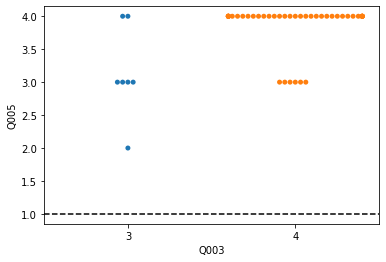

In [47]:
sns.swarmplot(data=ava, x='Q003', y='Q005')
plt.axhline(1.0, color='black', linestyle='--')

In [48]:
# 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
# Encontrada essa correlação entre as colunas Q004 e Q006 - "(0.696956) moderada para forte".
# Q004 - (Utilizar o AVA foi fácil e simples, não tive dificuldades).
# Q006 - (A interface do sistema foi amigável e de fácil manuseio).
#          ------As questões Q004 e Q006 tratam do manuseio do ambiente virtual de aprendizagem de forma amigável e intuitiva -------- 
# De posse dessas variáveis analisadas, também podemos destacar as "Q003" e "Q005" que apresentam uma correlação moderada, contudo tendenciando de - "(0.527999) moderada para fraca".
# Q003 - (O AVA possui ferramentas para discussão em grupos que favorece a feedback com meus colegas).
# Q005 - (As ferramentas disponíveis no AVA, como calendário, caixa de mensagens, chats, fóruns, questionários, entre outras, foram importantes para o meu aprendizado).
#         -------As questões Q003 e Q005 tratam do feedback entre os participantes, porém apesar do tema tratar sobre interação o que se observa é a "moderada para fraca correlação" no sentido de colaborar com o aprendizado --------
# As demais variáveis segundo a correlação de Pearson demonstraram fraca correlação conforme a célula em questão.
ava.corr('pearson')

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
Q001,1.000000,0.329634,0.396621,0.276657,0.213189,0.363683,0.062403,0.346257,0.337711,0.193512
Q002,0.329634,1.000000,0.212544,0.348214,0.381685,0.288625,-0.367484,0.045554,0.189310,0.159586
Q003,0.396621,0.212544,1.000000,0.255259,0.527999,0.130942,0.005135,0.341033,0.261880,0.286464
Q004,0.276657,0.348214,0.255259,1.000000,0.460445,0.696956,-0.050907,0.293998,0.203628,-0.071651
Q005,0.213189,0.381685,0.527999,0.460445,1.000000,0.199006,0.154903,0.287290,0.438264,0.375139
Q006,0.363683,0.288625,0.130942,0.696956,0.199006,1.000000,-0.046449,0.108578,0.119440,-0.086602
Q007,0.062403,-0.367484,0.005135,-0.050907,0.154903,-0.046449,1.000000,0.336123,0.305556,0.138109
Q008,0.346257,0.045554,0.341033,0.293998,0.287290,0.108578,0.336123,1.000000,0.527102,0.375344
Q009,0.337711,0.189310,0.261880,0.203628,0.438264,0.119440,0.305556,0.527102,1.000000,0.544311
Q010,0.193512,0.159586,0.286464,-0.071651,0.375139,-0.086602,0.138109,0.375344,0.544311,1.000000


In [0]:
# Calcule a correlação  
correlacoes = ava.corr()

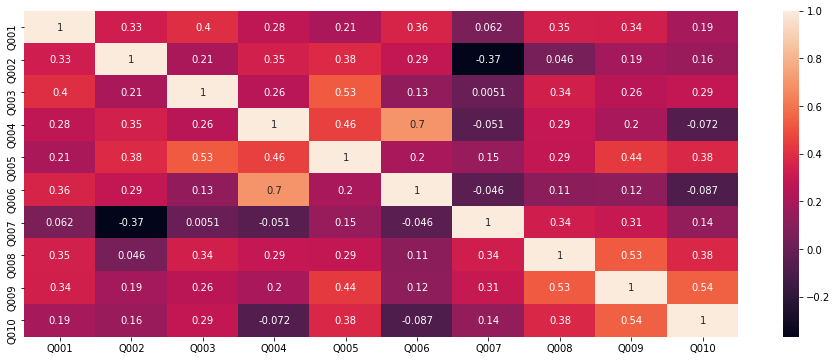

In [27]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)

In [49]:
# Apenas uma amostragem por acionamento mecânico, contudo vale apena automatizar como demonstrado acima.
ava['Q004'].corr(ava['Q006'])

0.6969564205487533

In [0]:
X = ava.drop(['Q004'], axis=1)
y = ava['Q004']

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
f_classif = SelectKBest(score_func=f_classif, k=4)
fit = f_classif.fit(X,y)
features = fit.transform(X)

# Visualizando as features:
print(features)

[[4 4 4 3]
 [4 4 4 4]
 [3 4 4 3]
 [3 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 3]
 [4 4 4 4]
 [3 4 4 3]
 [4 4 4 4]
 [4 4 3 3]
 [4 3 4 4]
 [4 4 3 4]
 [1 3 2 3]
 [3 4 4 3]
 [4 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [3 4 4 3]
 [4 4 4 4]
 [3 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [3 4 4 3]
 [4 4 4 4]
 [3 4 4 3]
 [3 3 4 3]
 [4 3 3 3]
 [4 4 4 4]
 [3 4 3 3]
 [3 4 4 4]
 [3 3 3 4]
 [2 4 3 4]
 [3 4 4 4]
 [4 4 4 4]
 [4 4 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [3 3 3 4]
 [4 3 3 2]
 [4 4 4 4]
 [4 4 4 3]
 [4 4 4 3]]


In [52]:
cols = fit.get_support(indices=True)
ava.iloc[:,cols]

,Q002,Q003,Q004,Q005
Escolas,,,,
Escola CA,4,4,3,4
Escola CA,4,4,4,4
Escola CA,3,4,3,4
Escola CA,3,4,2,3
Escola CA,4,4,3,4
Escola CA,4,4,4,4
Escola CA,4,4,3,4
Escola CA,4,4,4,4
Escola CA,3,4,4,4


In [0]:
#features categóricas ou variável alvo categórica
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
# feature extraction
test = SelectKBest(chi2, k=4)

In [0]:
fit = test.fit(X, y)

In [56]:

fit.get_support(indices=True)

array([1, 3, 4, 8])

In [0]:
features = fit.transform(X)

In [58]:
# Visualizando as features:
print(features)

[[4 4 3 4]
 [4 4 4 4]
 [3 4 3 4]
 [3 3 3 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 3 3]
 [4 4 4 4]
 [3 4 3 4]
 [4 4 4 4]
 [4 3 3 3]
 [4 4 4 3]
 [4 3 4 3]
 [1 2 3 3]
 [3 4 3 4]
 [4 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [3 4 3 4]
 [4 4 4 3]
 [3 4 4 3]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [4 4 4 4]
 [3 4 3 3]
 [4 4 4 4]
 [3 4 3 4]
 [3 4 3 3]
 [4 3 3 4]
 [4 4 4 4]
 [3 3 3 4]
 [3 4 4 4]
 [3 3 4 4]
 [2 3 4 3]
 [3 4 4 4]
 [4 4 4 4]
 [4 3 3 3]
 [4 4 4 4]
 [4 4 4 4]
 [3 3 4 3]
 [4 3 2 4]
 [4 4 4 3]
 [4 4 3 4]
 [4 4 3 4]]


In [59]:
cols = fit.get_support(indices=True)
ava.iloc[:, cols]

,Q002,Q004,Q005,Q009
Escolas,,,,
Escola CA,4,3,4,4
Escola CA,4,4,4,4
Escola CA,3,3,4,4
Escola CA,3,2,3,3
Escola CA,4,3,4,4
Escola CA,4,4,4,3
Escola CA,4,3,4,3
Escola CA,4,4,4,4
Escola CA,3,4,4,4


In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
from sklearn.feature_selection import RFE
rfe = RFE(model, 4)
fit = rfe.fit(X, y)

In [61]:
# Mostrando o número de features:
print ("Número de features: {}".format(fit.n_features_))  

Número de features: 4


In [62]:
# Visualizando os índices:
cols = fit.get_support(indices=True)
ava.iloc[:,cols]

,Q002,Q004,Q005,Q009
Escolas,,,,
Escola CA,4,3,4,4
Escola CA,4,4,4,4
Escola CA,3,3,4,4
Escola CA,3,2,3,3
Escola CA,4,3,4,4
Escola CA,4,4,4,3
Escola CA,4,3,4,3
Escola CA,4,4,4,4
Escola CA,3,4,4,4


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
# Score de cada um dos atributos:
print(model.feature_importances_)

[0.11660516 0.13193692 0.03960914 0.09350751 0.33167879 0.06348057
 0.1129164  0.05388431 0.05638121]


In [67]:
# Nome das colunas:
ava

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
Escolas,,,,,,,,,,
Escola CA,4,4,4,3,4,3,4,4,4,4
Escola CA,4,4,4,4,4,4,4,4,4,4
Escola CA,4,3,4,3,4,3,4,3,4,4
Escola CA,3,3,4,2,3,3,3,3,3,4
Escola CA,4,4,4,3,4,4,4,3,4,4
Escola CA,4,4,4,4,4,4,4,4,3,4
Escola CA,4,4,4,3,4,3,4,4,3,3
Escola CA,4,4,4,4,4,4,4,4,4,4
Escola CA,4,3,4,4,4,3,4,4,4,4


In [68]:
# Criando um Dataframe com as colunas e seus scores:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Q006,0.331679
Q002,0.131937
Q001,0.116605
Q008,0.112916
Q005,0.093508
Q007,0.063481
Q010,0.056381
Q009,0.053884
Q003,0.039609


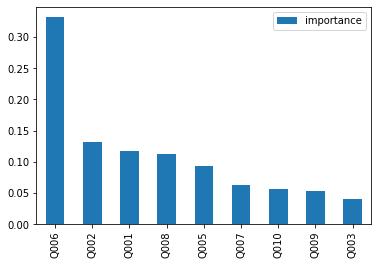

In [69]:
# Visualizando as importâncias de forma gráfica:
feature_importances.plot(kind='bar')

In [70]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
  ('feature_selection', RFE(LogisticRegression(max_iter=2000),4)),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('feature_selection',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=2000,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=4, step=1, verbose=0)),
                ('classi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        cl

In [71]:
clf.steps

[('feature_selection',
  RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=2000,
                                   multi_class='auto', n_jobs=None, penalty='l2',
                                   random_state=None, solver='lbfgs', tol=0.0001,
                                   verbose=0, warm_start=False),
      n_features_to_select=4, step=1, verbose=0)),
 ('classification',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_j

In [72]:
ava.describe()

,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.620000,3.480000,3.86000,3.300000,3.760000,3.460000,3.720000,3.680000,3.720000,3.740000
std,0.490314,0.646498,0.35051,0.707107,0.476381,0.542481,0.453557,0.471212,0.453557,0.443087
min,3.000000,1.000000,3.00000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
25%,3.000000,3.000000,4.00000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.250000
50%,4.000000,4.000000,4.00000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000
75%,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [73]:
# instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 44.7MB 575kB/s
     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 604kB 10.7MB/s 
     |████████████████████████████████| 3.1MB 18.1MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 296kB 45.2MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=2df0e49975886dff7a3e2bc24eb729cc6bf0d6c3fb983ccffd7e2e42f40ea83f
  Stored in directory: /tmp/pip-ephem-wheel-cache-yzrecj02/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=c26487231543834731304d528ca752b5b70664b5fa9b984960807b3fc845fc65
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=d450f9a099f2c01cca9b069810ccdee4c68f2007324c1d903971

In [0]:
# import o ProfileReport
from pandas_profiling import ProfileReport

In [0]:
# executando o profile
profile = ProfileReport(ava, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})

In [76]:
profile

In [77]:
# salvando o relatório no disco
profile.to_file(output_file="Relatorio01.html")

In [0]:
#Interpretando o valor de ρ

    #0.9 a 1 positivo ou negativo indica uma correlação muito forte.
    #0.7 a 0.9 positivo ou negativo indica uma correlação forte.
    #0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
    #0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
    #0 a 0.3 positivo ou negativo indica uma correlação desprezível.